# Task 2 : To explore Supervised Machine Learning

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
print("The libraries are imported")

The libraries are imported


In [4]:
# Reading data from remote link
url_data = "http://bit.ly/w-data"
students_data = pd.read_csv(url_data)
print("Data imported successfully")

students_data.head(10) #to see the first 10 rows

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Printing a concise summary of the DataFrame

students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Printing the number of rows and columns of the data

students_data.shape

(25, 2)

In [ ]:
#There are 25 rows and 2 columns in the dataframe

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

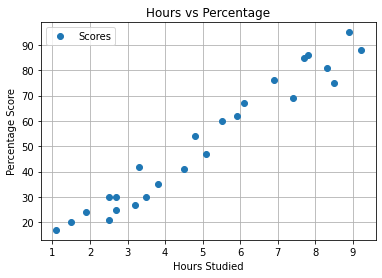

In [15]:
# Plotting the distribution of scores
students_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

[]

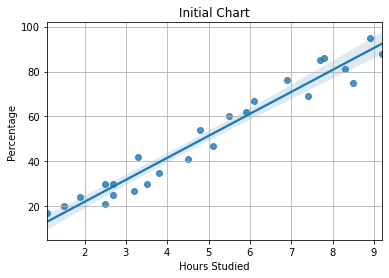

In [17]:
# Plotting the regression line to see the fitting
sns.regplot(x='Hours',y='Scores',data=students_data)
plt.title("Initial Chart")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.plot()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Data Preprocessing

### Missing value analysis

In [22]:
#Creating a dataframe with missing percentage
missing_values = pd.DataFrame(students_data.isnull().sum())

#Reseting the data
missing_values = missing_values.reset_index()

#Renaming the variable
missing_percentage = missing_values.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating the percentage
missing_percentage['Missing_percentage'] = (missing_percentage['Missing_percentage']/len(students_data))*100

#Sorting in descending order
missing_percentage = missing_percentage.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_percentage

,Variables,Missing_percentage
0,Hours,0.0
1,Scores,0.0


### Analysing the outliers, if any

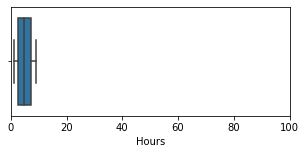

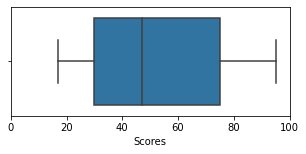

In [30]:
# Creating list of column names :

c=list(students_data.columns)

#Creating a loop for box plot for every variable:
for i in c:
    plt.figure(figsize=(5,2)) 
    plt.xlim(0,100)
    sns.boxplot(x=students_data[i],data=students_data,orient='h')
    plt.show()

In [ ]:
#There are no outliers present in the data

### Analysing the correlation between the variables

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

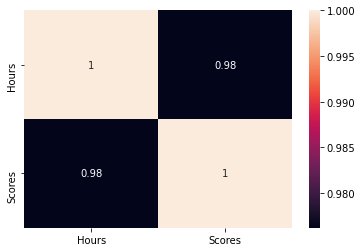

In [31]:
# Correlation heatmap
sns.heatmap(students_data.corr(),annot = True)

In [32]:
#there is very high correlation between scores and hours

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [33]:
X = students_data.iloc[:, :-1].values  
y = students_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [34]:
#Dividing the data into training and testing data using sckit-learn

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [36]:
#Checking the size
X_train.shape

(20, 1)

In [37]:
X_test.shape

(5, 1)

In [38]:
y_train.shape

(20,)

In [39]:
y_test.shape

(5,)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [40]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [44]:
# Calculating the coefficient and intercept of the linear regression model

intercept = regressor.intercept_
coefficient = regressor.coef_
print("The intercept is : ",intercept)
print("The cofficient is :",coefficient[0])

The intercept is :  2.018160041434683
The cofficient is : 9.910656480642237


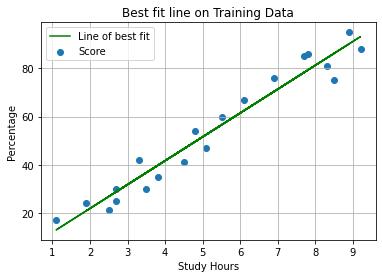

In [47]:
# # Plotting the regression line for the training data

plt.scatter(X_train,y_train, label="Score")
plt.plot(X_train, regressor.predict(X_train),color='green', label='Line of best fit')
plt.xlabel("Study Hours")
plt.ylabel("Percentage")
plt.title("Best fit line on Training Data")
plt.legend()
plt.grid()
plt.show()

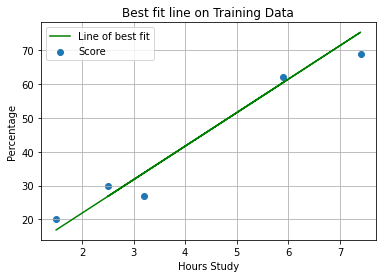

In [48]:
# # Plotting the regression line for the testing data

plt.scatter(X_test,y_test, label="Score")
plt.plot(X_test, regressor.predict(X_test),color='green', label='Line of best fit')
plt.xlabel("Hours Study")
plt.ylabel("Percentage")
plt.title("Best fit line on Training Data")
plt.legend()
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [49]:
#Displaying test data and predicting the score

print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Text(0, 0.5, 'Percentage Score')

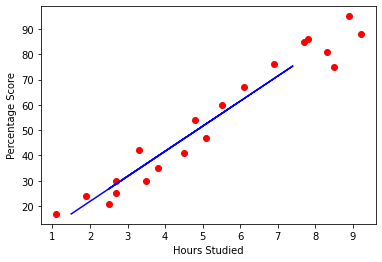

In [51]:
#Visualizing the data

plt.scatter(X_train,y_train, color= "red")
plt.plot(X_test,y_pred, color= "blue")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")

In [52]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [59]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
